In [405]:
# Code used for Fractional Score Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%store -r cg
%store -r mg


In [406]:
# Defining cg and mg to avoid dozens of 'variable is not defined' warnings
cg = cg
mg = mg


In [407]:
# Converts a number of wins, losses, and ties to a fractional score (fscore)
# wins + 0.5*ties all over the total amount of games
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code and reduce a lot of character repitition, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()

# Each graph below has a 'Overall' bar which contains the fscore of all games except for the first moves graphs.
# In which 'Overall' contains the fscore of all games in the specified color.
# Mainly used to give context of the other fscores in the chart.

In [420]:
cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()

won     4839
lost    1428
draw     467
Name: magnus_result, dtype: int64

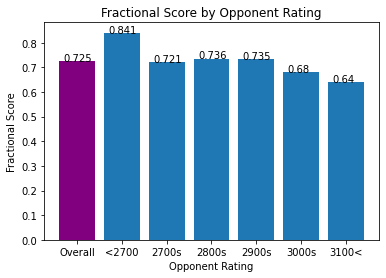

In [413]:
# Freqs: [2130, 1611, 2199, 2488, 3201, 1797] Each rating range below has 1600+ games.

x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] # Less characters
y = [fscore(vco(cg)),fscore(vc(mg,mg.opp_elo<2700)),
    fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),
    fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),
    fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),
    fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),
    fscore(vc(mg,mg.opp_elo>=3100))]
    
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Fractional Score by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Fractional Score')
for index, value in enumerate(y):
    plt.text(index-0.3, value,
             str(round(value,3)))
plt.show()

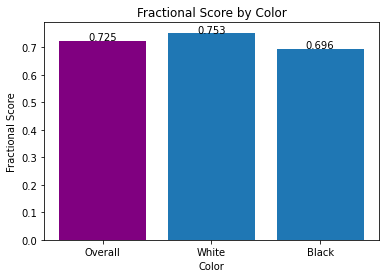

In [415]:
# 49.84% black, 50.16% white
# Significant 5% fractional score difference between black and white
x = ['Overall','White','Black']
y = [fscore(vco(cg)),fscore(vc(cg,cg.white=='Magnus Carlsen')),fscore(vc(cg,cg.black=='Magnus Carlsen'))]
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Fractional Score by Color')
plt.xlabel('Color')
plt.ylabel('Fractional Score')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)),ha='center')
plt.show()

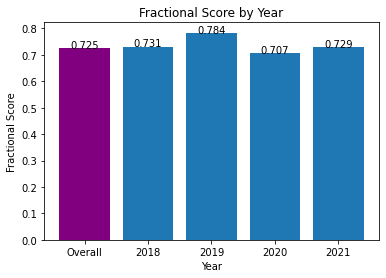

In [414]:
# Freqs: [1320, 1297, 6050, 4654]
x = ['Overall','2018','2019','2020','2021']
y = [fscore(vco(cg)),fscore(vc(cg,cg.datetime.str[0:4]=='2018')),
    fscore(vc(cg,cg.datetime.str[0:4]=='2019')),
    fscore(vc(cg,cg.datetime.str[0:4]=='2020')),
    fscore(vc(cg,cg.datetime.str[0:4]=='2021'))]
    
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Fractional Score by Year')
plt.xlabel('Year')
plt.ylabel('Fractional Score')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)),ha='center')
plt.show()

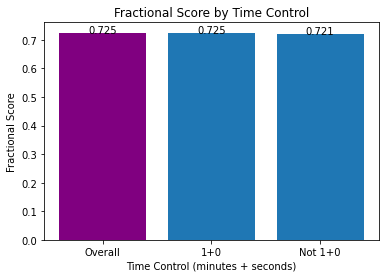

In [416]:
# 85% of games are 1+0, 6% of games are 3+0 and other time controls are even less frequent.
x = ['Overall','1+0','Not 1+0']
y = [fscore(vco(cg)),fscore(vc(cg,cg.time_control=='1+0')),fscore(vc(cg,cg.time_control!='1+0'))]
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Fractional Score by Time Control')
plt.xlabel('Time Control (minutes + seconds)')
plt.ylabel('Fractional Score')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)),ha='center')
plt.show()

<img src='ceChmnN.png' style='width:400px;height:400px'/>

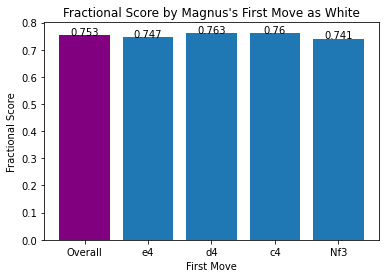

In [417]:
# Freqs: [2847, 1878, 708, 475] out of 6734 games as white
x = ['Overall','e4','d4','c4','Nf3']
y = [fscore(vc(cg,cg.magnus_color=='white')),fscore(vc(cg,cg.first_move=='e4')),
    fscore(vc(cg,cg.first_move=='d4')),fscore(vc(cg,cg.first_move=='c4')),fscore(vc(cg,cg.first_move=='Nf3'))]
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Fractional Score by Magnus\'s First Move as White')
plt.xlabel('First Move')
plt.ylabel('Fractional Score')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)),ha='center')
plt.show()

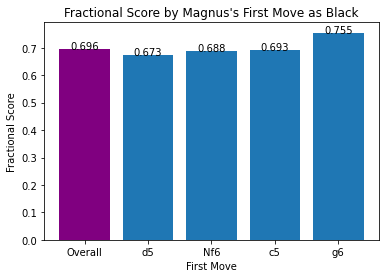

In [419]:
# Freqs: [1576, 1371, 1004, 798] out of 6692 games as black
x = ['Overall','d5','Nf6','c5','g6']
y = [fscore(vc(cg,cg.magnus_color=='black')), fscore(vc(cg,cg.first_move=='d5')),
    fscore(vc(cg,cg.first_move=='Nf6')), fscore(vc(cg,cg.first_move=='c5')), fscore(vc(cg,cg.first_move=='g6'))]
bars = plt.bar(x,y)
bars[0].set_facecolor('purple')
plt.title('Fractional Score by Magnus\'s First Move as Black')
plt.xlabel('First Move')
plt.ylabel('Fractional Score')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)),ha='center')
plt.show()